<a href="https://colab.research.google.com/github/sweta96/GoogleColab/blob/master/redwine(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%cd /content/gdrive/My\ Drive/Dataset
!ls

/content/gdrive/My Drive/Dataset
catanddog.zip  winequality_red.csv


In [0]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_csv("winequality_red.csv")

In [0]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 11].values

In [0]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=20)

In [0]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.fit_transform(x_train)  
x_test = scaler.fit_transform(x_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=12)  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [0]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 0  0  1  0  0  0]
 [ 0  0  5  2  0  0]
 [ 0  1 93 33  3  0]
 [ 0  0 41 82 13  0]
 [ 0  0  5 18 21  0]
 [ 0  0  0  0  2  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.64      0.72      0.68       130
           6       0.61      0.60      0.61       136
           7       0.54      0.48      0.51        44
           8       0.00      0.00      0.00         2

   micro avg       0.61      0.61      0.61       320
   macro avg       0.30      0.30      0.30       320
weighted avg       0.59      0.61      0.60       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.6125

In [0]:
error = []

for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

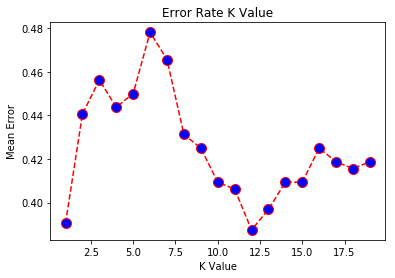

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')